$\mathrm{\huge{Neolithic\,Circular\,Enclosures}}$

$\mathrm{\large{Notebook\,III:\,Compare\,gates\,and\,search\,for\,conspicuous\,star\,distributions}}$


$\mathrm{Gerd\,Graßhoff^{1,2,3}, Gordon\,Fischer^{2}}$
  
1: Humboldt Universität zu Berlin, 2: Excellence Cluster Topoi  
3: Max Planck Institute for history  of science  
Corresponding mail: gerd.grasshoff@hu-berlin.de, gordon.fischer@topoi.org  
Date: 18.05.2017

**goal of research:** Compare gates (azimuth) for all objects in order to find a systematic
        
**keywords**: Neolithic Circular Enclosures, star position, altitude, azimuth

**Citable Class and python packages**

In [22]:
#IMPORT LIBRARIES
from citableclass import Citable 
import mpld3
from nested_lookup import nested_lookup
import csv
import json
import astronomia
import ephem
from ephem import *
import numpy as np
from ephem import stars 
import pandas as pd
db=stars.db
import numpy as np
import math
import os, sys
import warnings
from matplotlib.image import imread
from matplotlib.pyplot import figure, imshow, axis
from PIL import Image as pil
from IPython.display import display
from ipywidgets import widgets, interactive
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from collections import Counter
from ephem import Equatorial, Ecliptic
from IPython.display import Image, clear_output
from ipywidgets import FloatSlider,IntSlider,Dropdown,Label, Button, Layout, Textarea, HBox, VBox, ToggleButtons, RadioButtons, jslink,interact, interact_manual,Output, Text, FloatText, Select

**Helper functions**

In [23]:
# HELPER FUNCTIONS
#STAR CATALOGUE
pyephembsc = []
cit=Citable("BAAP00028", formats="et")
reader = cit.csv()
for row in reader:
    pyephembsc.append(row)

stars=[]
for j in range(len(pyephembsc)):
    stars.append(pyephembsc[j][0])
starsforwidget=stars;
stars=sorted(stars)

def CheckStars(starname):
    try:
        selectedstar=ephem.star(starname)
        return starname
    except:
        pass    
correctedStarlist=[]
for j in range(len(starsforwidget)):
    v1 = CheckStars(starsforwidget[j])
    if v1 != "no star":
        correctedStarlist.append(v1)
starsforwidget = [x for x in correctedStarlist if x is not None]
starsforwidget.insert(0,"no star")

# PLOT FUNCTION
def ShowImagesHorizontally(list_of_files):
    fig = plt.figure(figsize=(70, 60))
    number_of_files = len(list_of_files)
    for i in range(number_of_files):
        try:
            a=fig.add_subplot(1,number_of_files,i+1)
            image = imread(list_of_files[i])
            imshow(image,cmap='Greys_r')
            axis('off')
        except:
            pass
def ImageViewer(file):
    imgs_comb=[]
    for i in range(len(file)):
        try:
            file[i].metadata()
            file[i].imagesave('images/t'+str(i)+'.jpg')
            imgs_comb.append('images/t'+str(i)+'.jpg')
        except:
            pass
    return ShowImagesHorizontally(imgs_comb)

# Analysis function

   

In [24]:
#DEFINE GATES FUNCTION
Objects={"all":{"QuedlinburgI":"KGAL0003","QuedlinburgII":"KGAL0007", "Hopferstadt":"KGAL0023", "Bielen":"KGAL0011","Ippesheim":"KGAL0027","Goseck":"KGAL0019", 
         "Dresden-NickernI":"KGAL0039", "Dresden-NickernII":"KGAL0043",  "Bochow":"KGAL0015", "Dresden-NickernIII":"KGAL0047", "Koetschlitz":"KGAL0031"},
"2 gates":{"QuedlinburgI":"KGAL0003","QuedlinburgII":"KGAL0007", "Hopferstadt":"KGAL0023", "Bielen":"KGAL0011","Ippesheim":"KGAL0027"}}

def Gates(author="Michel", objects="all", number_bins=10):
    gateslist=list()
    
    for element in sorted(Objects[objects].values()):
        v=Citable(element, formats="et")
        anlage=v.json()
        for i in list(anlage["gate"].keys()):
            if  i==author:
                gateslist.append(anlage["gate"][i])
            d = [item for sublist in gateslist for item in sublist]
    data=list()
    for element in d:
        data.append(np.mean(element))
    bins = np.linspace(math.ceil(min(data)), 
                       math.floor(max(data)),number_bins) # fixed number of bins
    plt.figure(figsize=(15,10))
    plt.xlim([min(data)-5, max(data)+5])
    plt.hist(data, bins=bins, alpha=0.5)
    plt.title('distribution of gates ('+author+'), mean value of gates', fontsize=18)
    plt.xlabel('midpoint of gate [Azimuth [°]]', fontsize=15)
    plt.ylabel('count', fontsize=15)
    plt.show()

# Visualization

- only objects (5) with observer NOT in center of the circular enclosure

In [25]:
#Gates(author="Michel", objects="2 gates", number_bins=12)

In [26]:
# WIDGET I
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')
Authors=["Michel", "Becker", "Staeuble", "Schier", "Schweitzer"]
par1=widgets.Dropdown(
    continuous_update=False,options=Authors, description='',  layout=Layout(margin='10px 10px 10px -50px', min_height='40px', width='200px'),
    disabled=False
)
par2=widgets.Dropdown(
    continuous_update=False,options=list(Objects.keys()), description='',  value="all", layout=Layout(margin='10px 10px 10px -50px', min_height='40px', width='200px'),
    disabled=False
)

run1=widgets.Button(description='show')
def ChangeParameter1(res):
    Par1=par1.value
    clear_output()
    display(HBox([Label('author', layout=Layout(width='280px')), par1]),HBox([Label('objects', layout=Layout(width='280px')), par2]),run1)
    display(Gates(author=Par1))
    return;

run1.on_click(ChangeParameter1)
#display(HBox([Label('author', layout=Layout(width='280px')), par1]),HBox([Label('objects', layout=Layout(width='280px')), par2]),run1)

## Show maps

In [27]:
# DEFINE FUNCTION
def ShowObjects(enclosure="KGAL0001"):
    query=[enclosure+'/0', enclosure+'/1', enclosure+'/2', enclosure+'/3', enclosure+'/4', enclosure+'/5', enclosure+'/6']
    return ImageViewer(Citable(query, formats="et"))

Button(description='show', style=ButtonStyle())

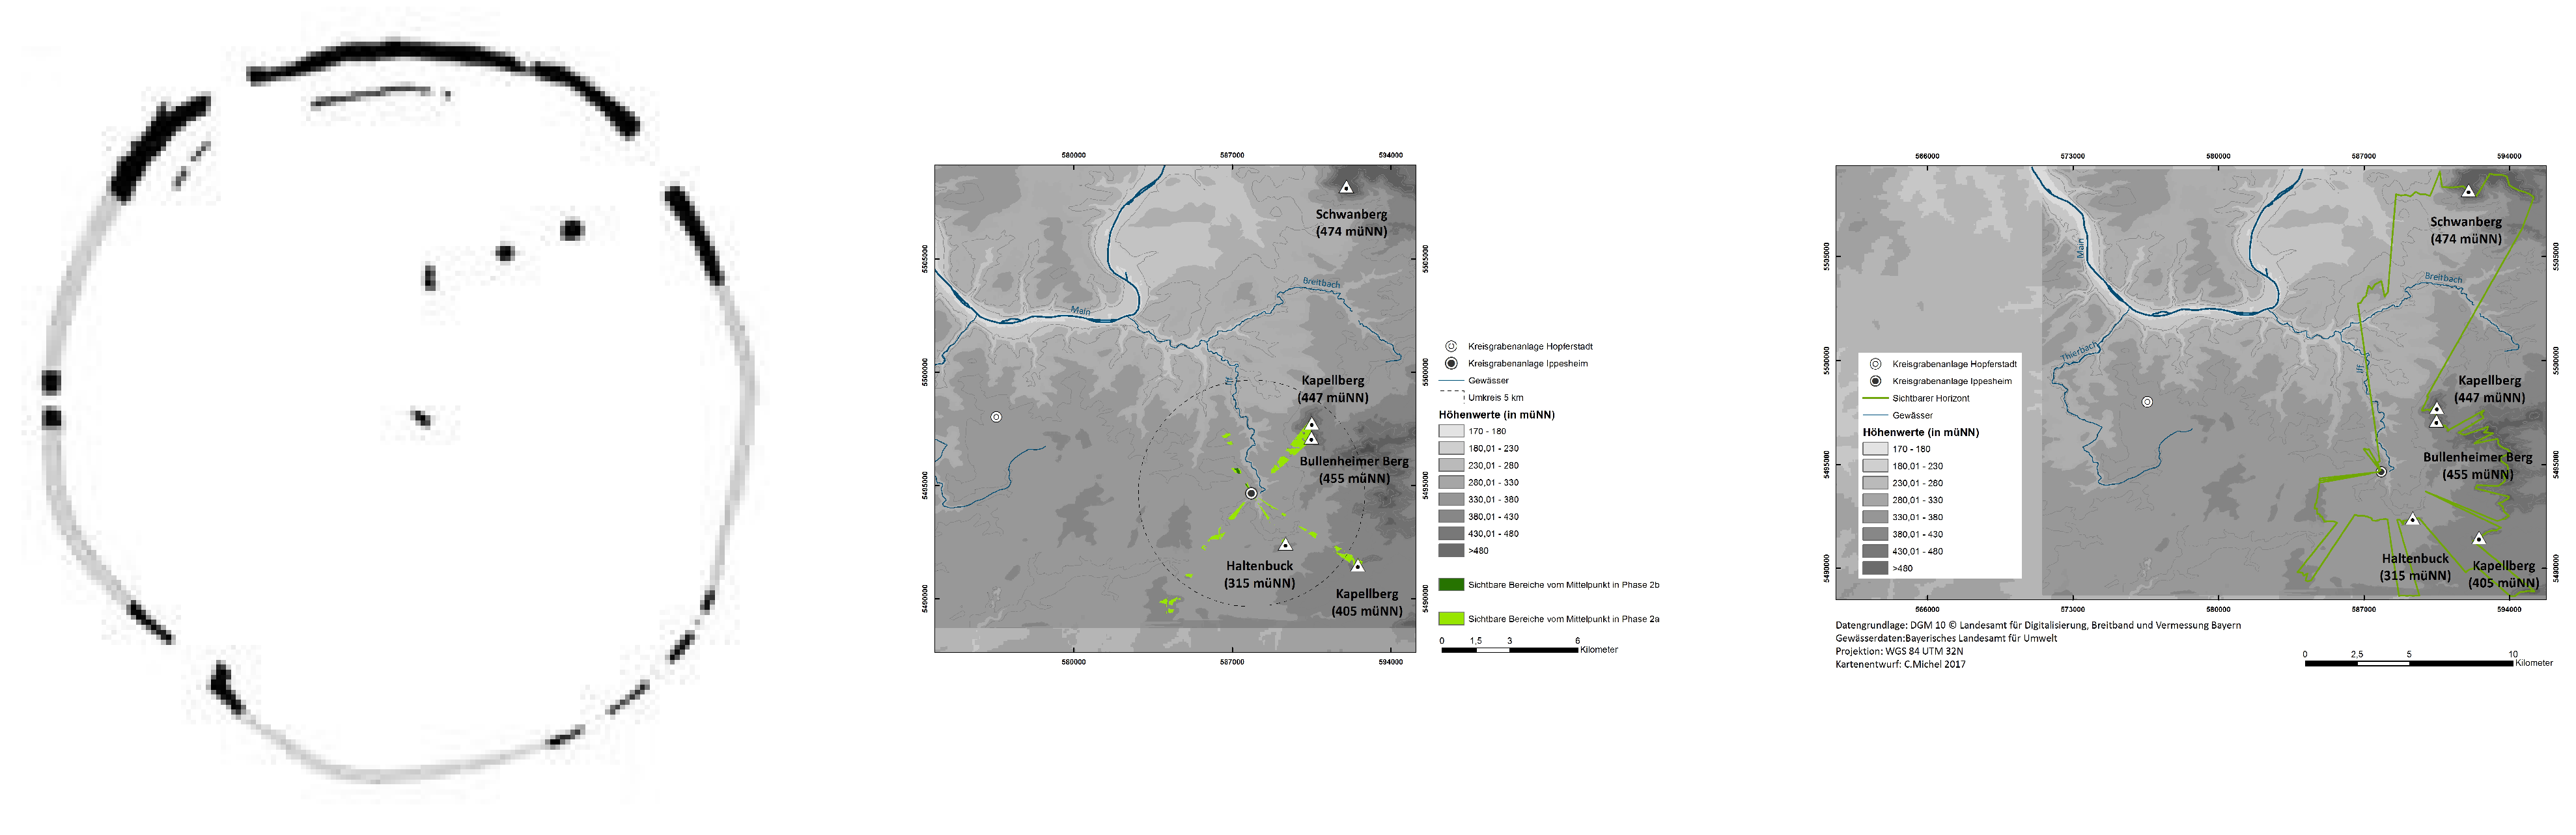

In [41]:
# WIDGET II
warnings.filterwarnings('ignore')
Objects1={"QuedlinburgI":"KGAL0001","QuedlinburgII":"KGAL0005", "Hopferstadt":"KGAL0021", "Bielen":"KGAL0009","Ippesheim":"KGAL0025","Goseck":"KGAL0017", 
         "Dresden-NickernI":"KGAL0037", "Dresden-NickernII":"KGAL0041",  "Bochow":"KGAL0013", "Dresden-NickernIII":"KGAL0045", "Koetschlitz":"KGAL0029"}
par3=widgets.Dropdown(
    continuous_update=False,options=sorted(Objects1.keys()), description='',  layout=Layout(margin='10px 10px 10px -50px', min_height='40px', width='200px'),
    disabled=False
)
run3=widgets.Button(description='show')
def ChangeParameter2(res):
    Par3=par3.value
    objectfile=Objects1[par3.value]
    clear_output()
    display(HBox([Label('object', layout=Layout(width='280px')), par3]),run3)
    #display(ShowObjects(enclosure=objectfile))
    
    return ShowObjects(enclosure=objectfile)

run3.on_click(ChangeParameter2)
display(HBox([Label('object', layout=Layout(width='280px')), par3]),run3)

# Run statistic in order to find significant star cluster

In [29]:
# FUNCTION I: FIND  STAR CLUSTER IN GATE
ReverseObjects={"KGAL0003":"QuedlinburgI","KGAL0007":"QuedlinburgII", "KGAL0023":"Hopferstadt", "KGAL0011":"Bielen","KGAL0027":"Ippesheim"}
def FindStarCluster(year=-4700, starname="Sirius", objects="KGAL0003", max_offset=2):
    
    gatech = ephem.Observer()
    v=Citable(objects, formats="et")
    anlage=v.json()
    print(anlage)
    # Umrechnung der Werte für das Horizontprofil
    profil=[]
    profilAz=[]
    profilAlt=[]
    az = anlage["profile"]["azimuth"]
    zenitwinkel= anlage["profile"]["altitude"]
    for j in range(len(az)):

        if  float(az[j])>=90 and float(az[j])<360:
            profil.append(((-1*float(az[j]))+360+90,90-float(zenitwinkel[j]) ))

        if float(az[j])<90:
            profil.append(((-1*float(az[j]))+90,90-float(zenitwinkel[j]) ))
    
    profil = sorted(profil,key=lambda l:l[0], reverse=False)
    profilAz=[row[0] for row in profil]
    profilAlt=[row[1] for row in profil]
    gatech.lat, gatech.lon =str(anlage["coordinates"]["latitude"]) , str(anlage["coordinates"]["longitude"])
    templist=[]
    azimuthStar=[]
    altitudeStar=[]
    tryv=True
    for j in range(96):

        try:
            gatech.date = str(year)+"/1/1  "+str(j/4.)+":00:00"
            selectedstar=ephem.star(starname)
            selectedstar.compute(gatech)
            templist.append((float(selectedstar.az*180/3.14), float(selectedstar.alt*180/3.14) ))
            templist = sorted(templist,key=lambda l:l[0], reverse=False)
            azimuthStar = [row[0] for row in templist]
            altitudeStar = [row[1] for row in templist]
        except:
            tryv=False
            pass
    
    candidates=[]
    d1=[]
    
    authorlist= list(anlage["gate"].keys())
    for k in range(len(authorlist)):
        for m in range(len(anlage["gate"][authorlist[k]])):
            d=np.array(azimuthStar)[np.array(azimuthStar)>anlage["gate"][authorlist[k]][m][0]]
            e=d[d<anlage["gate"][authorlist[k]][m][1]]
            for p in range(len(e)):
                sel=np.where(azimuthStar==e[p])[0][0]
                ind=profilAz.index(min(profilAz, key=lambda x:abs(x-azimuthStar[sel])))
                
                if len(e)>0 and altitudeStar[sel]>profilAlt[ind] and altitudeStar[sel]<profilAlt[ind] + max_offset:
                    candidates.append({"object": ReverseObjects[objects] ,"year":year, "author":authorlist[k], "star":starname, "azimuth":e,"gate":m+1})
                    #candidates.append(m+1)
        
    return candidates;


In [30]:
#Plot All Stars
def PlotAllStars(date,sky="west", horizon=0):
    # DEFINE GLOBAL PARAMETER
    colorlist=['b', 'g', 'r', 'c', 'm', 'y', 'k','b--', 'g--', 'r--', 'c--', 'm--', 'y--', 'k--', 'g:', 'r:', 'c:', 'm:', 'y:', 'k:']
    l=-1
    minx=0
    maxx=360
    #LOAD DATA
    v=Citable("KGAL0003", formats="et")
    anlage=v.json()
    # ASTRONOMICAL COMPUTATION
    gatech = ephem.Observer()
    gatech.lat, gatech.lon =str(anlage["coordinates"]["latitude"]) , str(anlage["coordinates"]["longitude"])
    starname=starsforwidget[1:]
    fig=plt.figure(figsize=(37,16))
    gates=[[21,23], [134,136], [214, 217],[312, 313], [7.5, 14.5], [225,246],[323, 338],[120.1, 144.49], [155.68, 175], [275, 277],
          [53.77, 56.02],[81.62, 92.14],[110.04, 111.46] , [205.12, 205.74],[248.29, 248.63] ,[255.33, 262.39], [296.91, 297.46],[308.7, 321.23] ,[340.64,352.03]]
    
    #STAR
    for element in starname:
        templist=list()
        mag=0

        for j in range(192):
            gatech.date =str(date) +' '+str(j/8.)+":00:00"
            ephem.star(element)
            selectedstar=ephem.star(element)
            selectedstar.compute(gatech)
            mag=selectedstar.mag
            templist.append((float(selectedstar.az*180/3.14), float(selectedstar.alt*180/3.14) ))

        templist = sorted(templist,key=lambda l:l[0], reverse=False)
        azimuthStar = [row[0] for row in templist]
        altitudeStar = [row[1] for row in templist]
        ind=altitudeStar.index(min(altitudeStar, key=lambda x:abs(x-horizon)))
        
        for obj in gates:
            if sky=="west":
                minx=180
                maxx=360
                if azimuthStar[ind]>180:
                    plt.plot(azimuthStar,altitudeStar, "k--", alpha=0.35, linewidth=1)
                    if azimuthStar[ind] >= obj[0] and  azimuthStar[ind]<=obj[1] :
                        l=l+1
                        plt.plot(azimuthStar,altitudeStar, colorlist[l], linewidth=3.5, label=str(element)+', mag: '+str(mag))
                        break
             
                        
                
            if sky=="east":
                minx=0
                maxx=180
                if azimuthStar[ind]<=180:
                    plt.plot(azimuthStar,altitudeStar, "k--", alpha=0.35, linewidth=1)
                    if azimuthStar[ind] >= obj[0] and  azimuthStar[ind]<=obj[1] :
                        l=l+1
                        plt.plot(azimuthStar,altitudeStar, colorlist[l], linewidth=3.5, label=str(element)+', mag: '+str(mag))
                        break
                  
                        
                        
      
    #PLOT GATES
    for element in gates:
        plt.axvspan(element[0], element[1], alpha=0.25, color='orange')
    # PLOT THESHOLD (ALTITUDE) 
    plt.plot([minx, maxx],[horizon]*2)
    plt.xlim(minx, maxx)
    plt.ylim(-0.2,horizon+0.2)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0., fontsize=18)
    plt.xlabel('Azimuth [°]', fontsize=23)
    plt.ylabel('Altitude [°]', fontsize=23)
    plt.title("stars", fontsize=23)
    
    return plt.show()

## All stars

yellow area in plot: azimuth for correlated gates 

### western sky

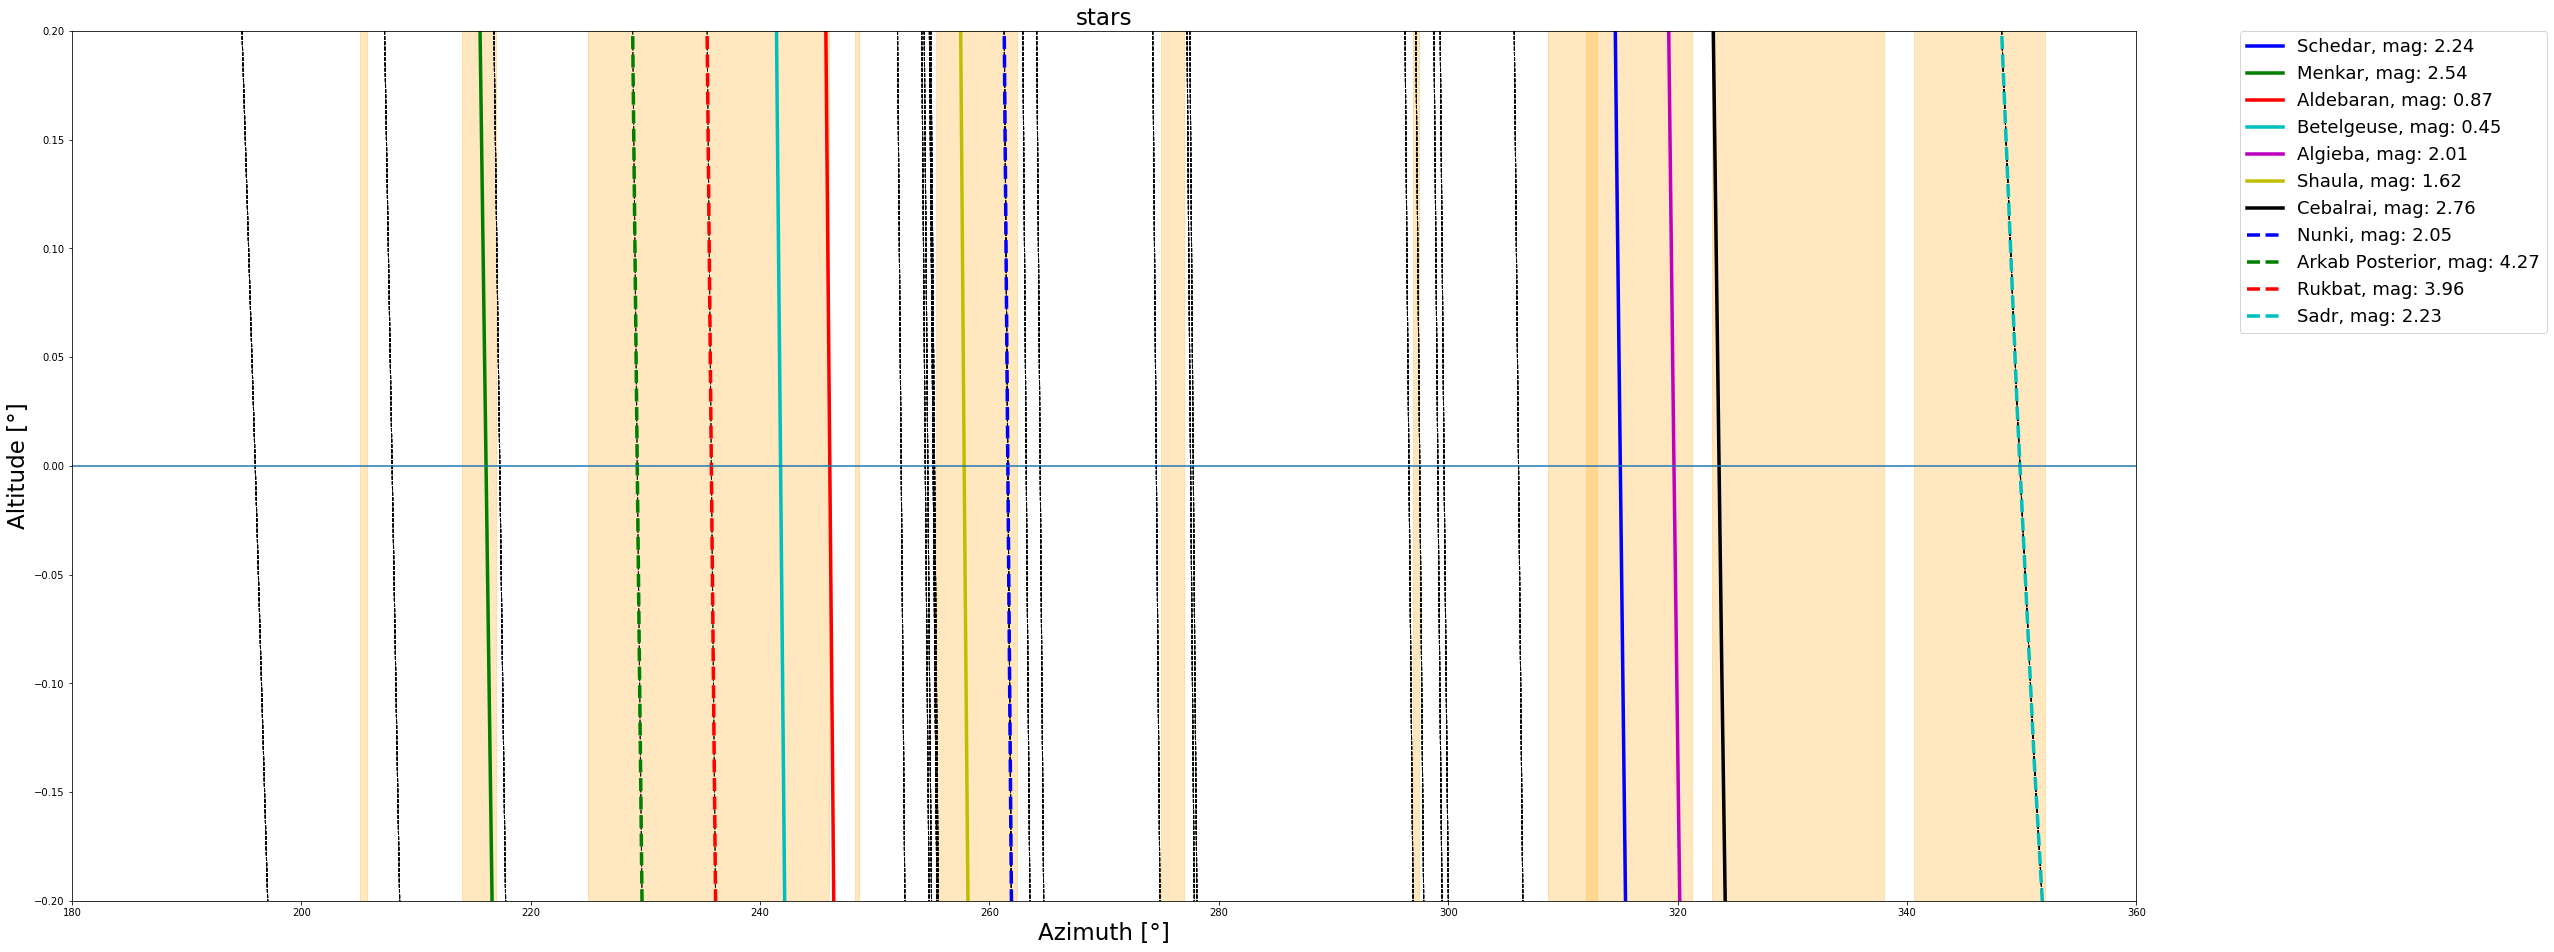

In [31]:
PlotAllStars("-4800/1/1",  sky="west", horizon=0)

### eastern sky

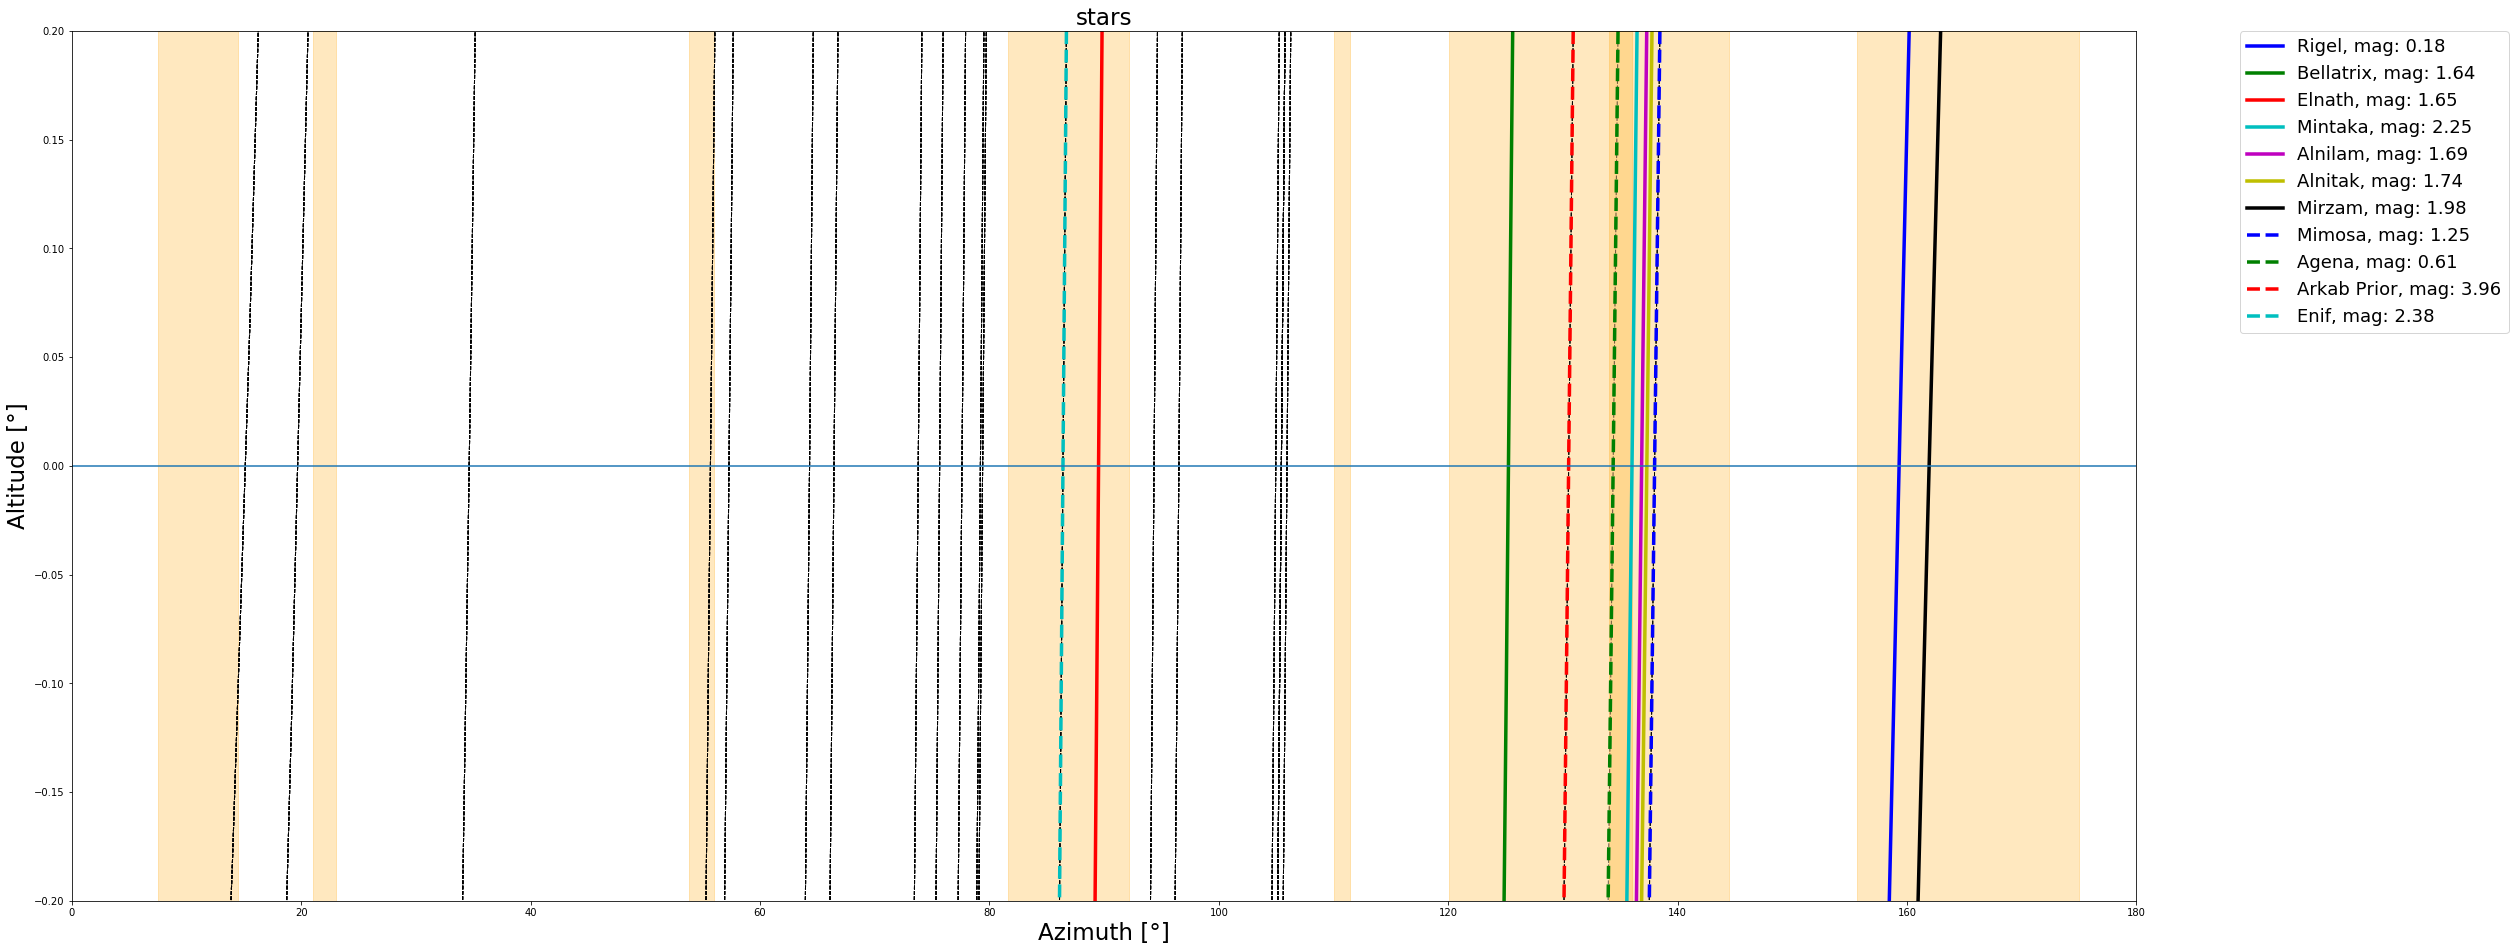

In [32]:
PlotAllStars("-4800/1/1", sky="east", horizon=0)

## Search for a certain star

In [33]:
# FUNCTION FOR SUN, MOON & STARS

def AzimuthAltitudeFull(date="-4850/1/1", starname=["Sirius", "Alnitak", "Mintaka", "Alnilam"], Anlage="KGAL0003", special="no selection", xmin=100, xmax=230, ymin=0, ymax=10, pressureval=1013, zoom=False):
    
    gatech = ephem.Observer()
    gatech.pressure=pressureval
    v=Citable(Anlage, formats="et")
    anlage=v.json()
    
    # Korrektur der Werte
    profil=[]
    profilAz=[]
    profilAlt=[]
    az = anlage["profile"]["azimuth"]
    zenitwinkel= anlage["profile"]["altitude"]

#LOOP  
    for j in range(len(az)):
   
        if  float(az[j])>=90 and float(az[j])<360:
            profil.append(((-1*float(az[j]))+360+90,90-float(zenitwinkel[j]) ))
            
        if float(az[j])<90:
            profil.append(((-1*float(az[j]))+90,90-float(zenitwinkel[j]) ))
            

    profil = sorted(profil,key=lambda l:l[0], reverse=False)
    profilAz=[row[0] for row in profil]
    profilAlt=[row[1] for row in profil]
    gatech.lat, gatech.lon =str(anlage["coordinates"]["latitude"]) , str(anlage["coordinates"]["longitude"])
    
    p = Equatorial('90', '0', epoch=str(date.split("/")[0]))
    eclipt= float(Ecliptic(p).lat)*180/3.14

    fig, ax = plt.subplots(1, figsize=(25,12))
    plt.xlim(xmin, xmax)
    plt.ylim(ymin,ymax)
    
    #Horizontprofil
    plt.plot(profilAz,profilAlt , 'k', label="visible horizon")
    plt.plot([0,360],[0,0] , 'k--', label="math. horizon")
  
    
    #Plot Tore
    authorlist= list(anlage["gate"].keys())
    colorlist = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b--', 'g--', 'r--', 'c--', 'm--', 'y--', 'k--']
    
    for k in range(len(authorlist)):

        for m in range(len(anlage["gate"][authorlist[k]])):
            
            if k== 0:
                if m == 0:
                    plt.fill_between([anlage["gate"][authorlist[k]][m][0],anlage["gate"][authorlist[k]][m][1]],[ymax, ymax], label="gate:  (acc. to "+str(authorlist[k])+ ")", facecolor=colorlist[k],alpha=0.5 )
                else:
                    plt.fill_between([anlage["gate"][authorlist[k]][m][0],anlage["gate"][authorlist[k]][m][1]],[ymax, ymax], facecolor=colorlist[k], alpha=0.5)
            if k==1:
                if m == 0:
                    plt.plot([anlage["gate"][authorlist[k]][m][0],anlage["gate"][authorlist[k]][m][0]],[0,ymax],ls="-",c="black", linewidth=0.7)
                    plt.plot([anlage["gate"][authorlist[k]][m][1],anlage["gate"][authorlist[k]][m][1]],[0,ymax],ls="-",c="black", linewidth=0.7)
                    plt.fill_between([anlage["gate"][authorlist[k]][m][0],anlage["gate"][authorlist[k]][m][1]],[ymax, ymax], label="gate:  (acc. to "+str(authorlist[k])+ ")", facecolor="none",
                                     hatch="///", edgecolor="black", linewidth=0.0 )
                else:
                    plt.plot([anlage["gate"][authorlist[k]][m][0],anlage["gate"][authorlist[k]][m][0]],[0,ymax],ls="-",c="black", linewidth=0.7)
                    plt.plot([anlage["gate"][authorlist[k]][m][1],anlage["gate"][authorlist[k]][m][1]],[0,ymax],ls="-",c="black", linewidth=0.7)
                    plt.fill_between([anlage["gate"][authorlist[k]][m][0],anlage["gate"][authorlist[k]][m][1]],[ymax, ymax],facecolor="none",
                                     hatch="///", edgecolor="black", linewidth=0.0 )
            if k==2:
                if m == 0:
                    plt.plot([anlage["gate"][authorlist[k]][m][0],anlage["gate"][authorlist[k]][m][0]],[0,ymax],ls="-",c="red", linewidth=0.7)
                    plt.plot([anlage["gate"][authorlist[k]][m][1],anlage["gate"][authorlist[k]][m][1]],[0,ymax],ls="-",c="red", linewidth=0.7)
                    plt.fill_between([anlage["gate"][authorlist[k]][m][0],anlage["gate"][authorlist[k]][m][1]],[ymax, ymax], label="gate:  (acc. to "+str(authorlist[k])+ ")", facecolor="none",
                                     hatch="///", edgecolor="red", linewidth=0.0 )
                else:
                    plt.plot([anlage["gate"][authorlist[k]][m][0],anlage["gate"][authorlist[k]][m][0]],[0,ymax],ls="-",c="red", linewidth=0.7)
                    plt.plot([anlage["gate"][authorlist[k]][m][1],anlage["gate"][authorlist[k]][m][1]],[0,ymax],ls="-",c="red", linewidth=0.7)
                    plt.fill_between([anlage["gate"][authorlist[k]][m][0],anlage["gate"][authorlist[k]][m][1]],[ymax, ymax],facecolor="none",
                                     hatch="///", edgecolor="red", linewidth=0.0 )

    #Plot Special Features
    authorlist= list(anlage["specialfeatures"].keys())
    colorlist = ["lightblue",  "lightgreen"]

    
    for k in range(len(authorlist)):
        for m in range(len(anlage["specialfeatures"][authorlist[k]])):
           
            if k==0:
                if m == 0:
                    plt.plot([anlage["specialfeatures"][authorlist[k]][m][0], anlage["specialfeatures"][authorlist[k]][m][0]],[0,ymax],ls="-",c="black", linewidth=0.7)
                    plt.plot([anlage["specialfeatures"][authorlist[k]][m][1], anlage["specialfeatures"][authorlist[k]][m][1]],[0,ymax],ls="-",c="black", linewidth=0.7)
                    plt.fill_between([anlage["specialfeatures"][authorlist[k]][m][0],anlage["specialfeatures"][authorlist[k]][m][1]],[ymax, ymax], label="special features: (acc. to " +str(authorlist[k])+")", facecolor="none", hatch="\\\\", edgecolor="black", linewidth=0.0)
                else:
                    plt.plot([anlage["specialfeatures"][authorlist[k]][m][0], anlage["specialfeatures"][authorlist[k]][m][0]],[0,ymax],ls="-",c="black", linewidth=0.7)
                    plt.plot([anlage["specialfeatures"][authorlist[k]][m][1], anlage["specialfeatures"][authorlist[k]][m][1]],[0,ymax],ls="-",c="black", linewidth=0.7)
                    plt.fill_between([anlage["specialfeatures"][authorlist[k]][m][0],anlage["specialfeatures"][authorlist[k]][m][1]],[ymax, ymax], facecolor="none",hatch="\\\\", edgecolor="black", linewidth=0.0)
            if k==1:
                if m == 0:
                    plt.fill_between([anlage["specialfeatures"][authorlist[k]][m][0],anlage["specialfeatures"][authorlist[k]][m][1]],[ymax, ymax], label="special features: (acc. to " +str(authorlist[k])+")", facecolor=colorlist[k],alpha=0.7 )
                else:
                    plt.fill_between([anlage["specialfeatures"][authorlist[k]][m][0],anlage["specialfeatures"][authorlist[k]][m][1]],[ymax, ymax], facecolor=colorlist[k], alpha=0.7)
     
        
  
    #Star
    colorlists=['b', 'g', 'r', 'c', 'm', 'y', 'k','b--', 'g--', 'r--', 'c--', 'm--', 'y--', 'k--']
    l=0
    for element in starname:
        l=l+1
        templist=list()
        try: 
            for j in range(96):
                gatech.date =str(date) +' '+str(j/4.)+":00:00"
                ephem.star(element)
                selectedstar=ephem.star(element)
                selectedstar.compute(gatech)
                mag=selectedstar.mag
                
                templist.append((float(selectedstar.az*180/3.14), float(selectedstar.alt*180/3.14) ))
               
        
        except:
            pass
        templist = sorted(templist,key=lambda l:l[0], reverse=False)
        azimuthStar = [row[0] for row in templist]
        altitudeStar = [row[1] for row in templist]
        plt.plot(azimuthStar,altitudeStar, colorlists[l], label=str(element)+', mag: '+str(mag))

    
    plt.legend(bbox_to_anchor=(0.78, 0.95), loc=2, borderaxespad=0., fontsize=15)
    plt.xlabel('Azimuth [°]')
    plt.ylabel('Altitude [°]')
    plt.title("object: "+anlage["object"]+' (latitude: '+str(anlage["coordinates"]["latitude"])+ '°;  longitude: '+str(anlage["coordinates"]["longitude"])+  '°)\n date: '+str(date)+'\n pressure: '+str(pressureval)+' mBar '+'ecliptic: '+str(eclipt)+'°')
    return plt.show()

In [34]:
#ANALYSE
#%%capture
brighteststars=["Sirius","Canopus", "Arcturus", "Vega", "Capella","Rigel", "Procyon", "Achernar", "Betelgeuse", "Agena", "Altair", "Aldebaran", "Spica", "Antares", "Pollux", "Fomalhaut", "Deneb", "Mimosa", "Regulus",
                "Adara", "Castor"]
#result=SearchGate(starlist=brighteststars)
#result

### Quedlinburg I

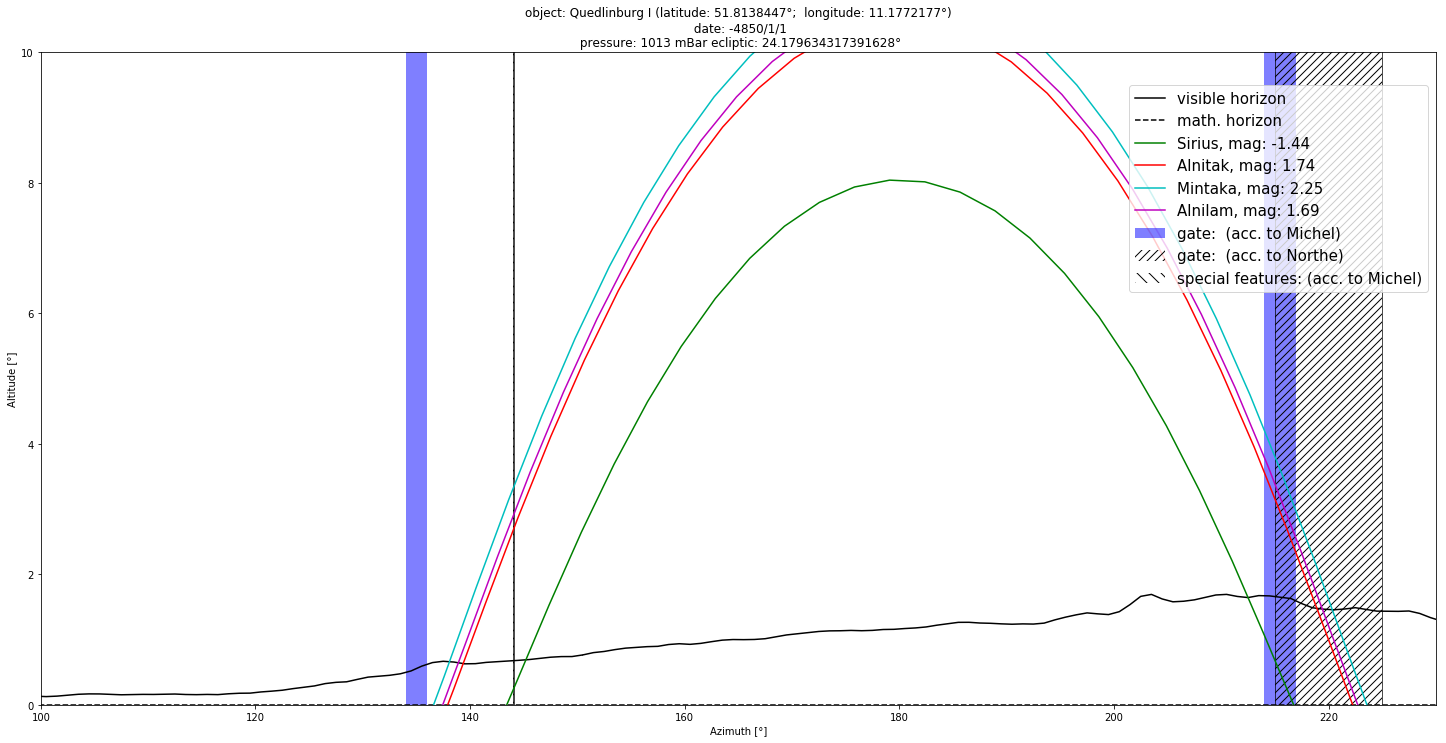

In [35]:
AzimuthAltitudeFull()

### Quedlinburg II

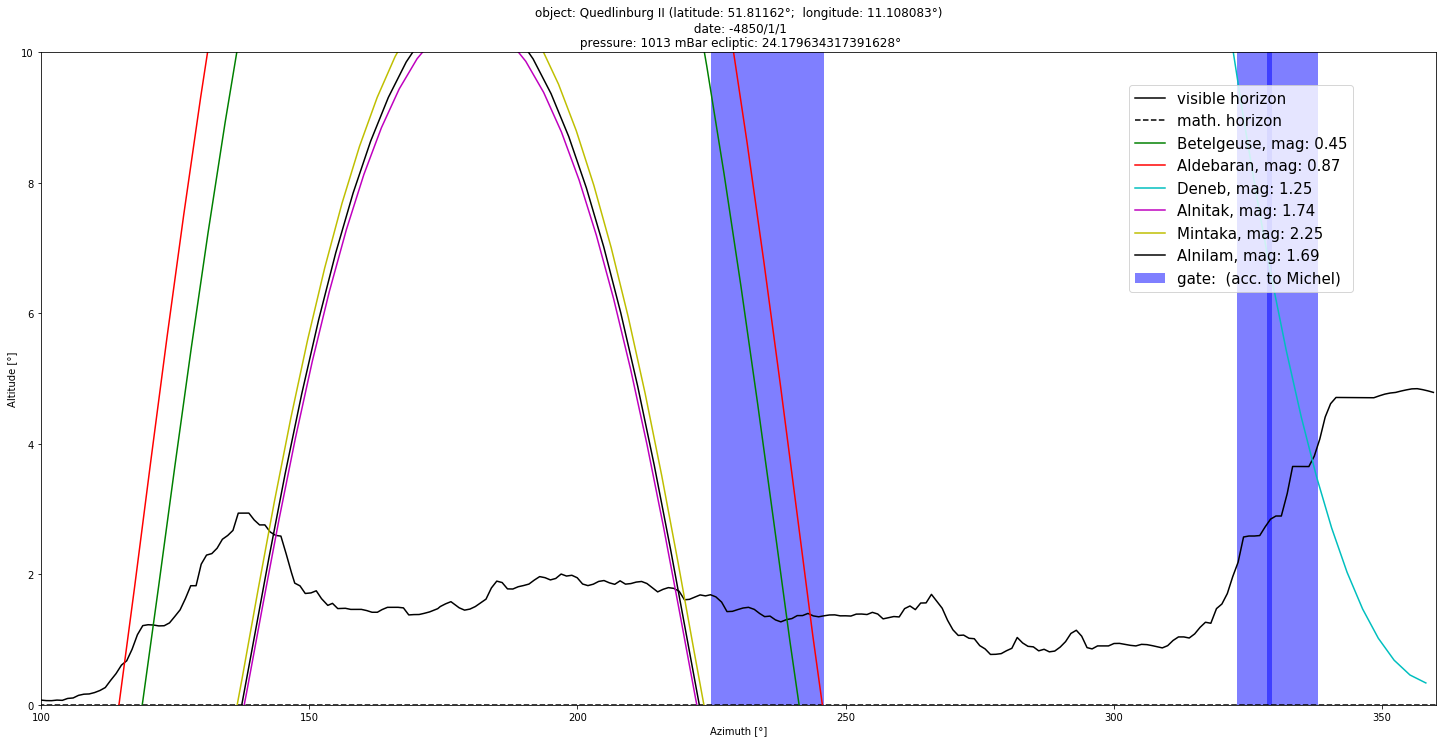

In [36]:
AzimuthAltitudeFull(date="-4850/1/1", starname=["Betelgeuse", "Aldebaran", "Deneb",  "Alnitak", "Mintaka", "Alnilam"], Anlage="KGAL0007", special="no selection", xmin=100, xmax=360, ymin=0, ymax=10, pressureval=1013, zoom=False)

### Bielen

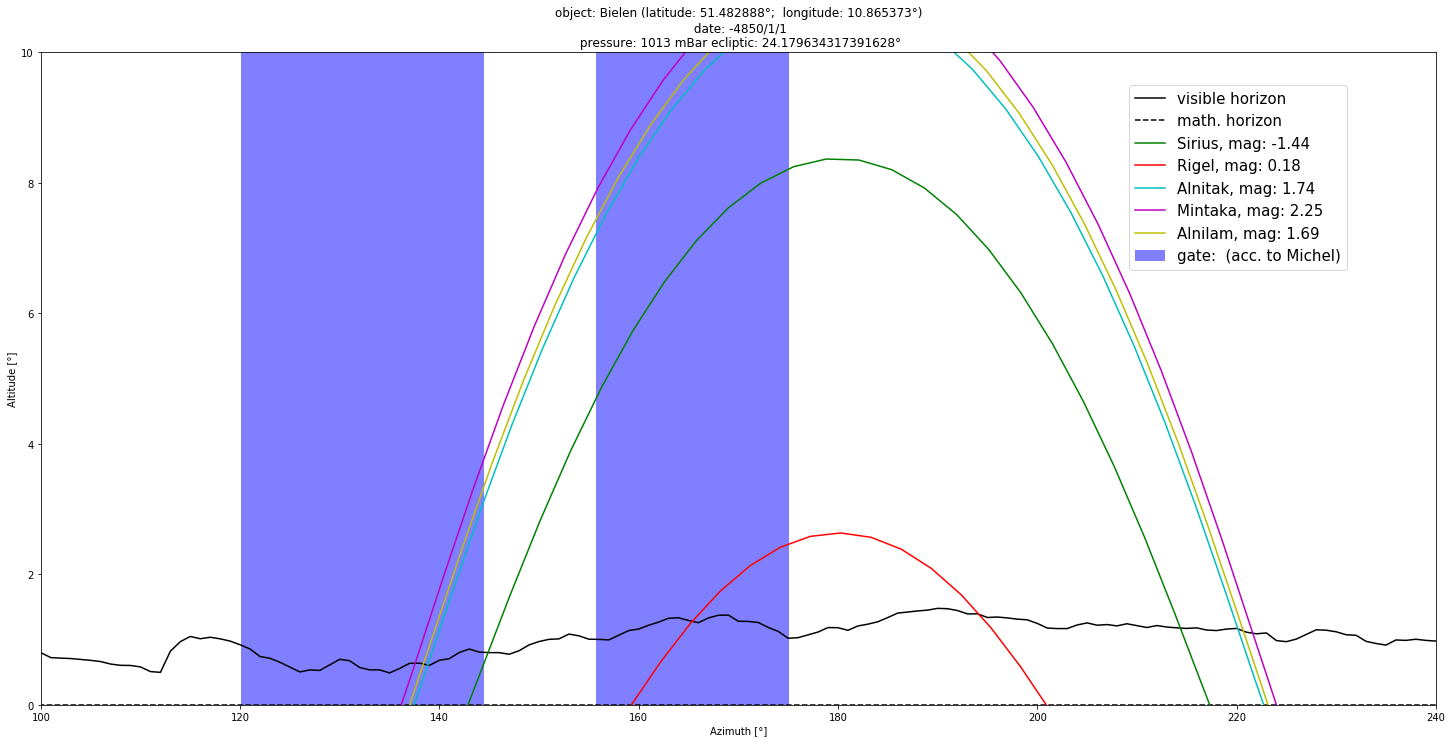

In [37]:
AzimuthAltitudeFull(date="-4850/1/1", starname=["Sirius", "Rigel", "Alnitak", "Mintaka", "Alnilam"] ,  Anlage="KGAL0011", special="no selection", xmin=100, xmax=240, ymin=0, ymax=10, pressureval=1013, zoom=False)

### Ippesheim

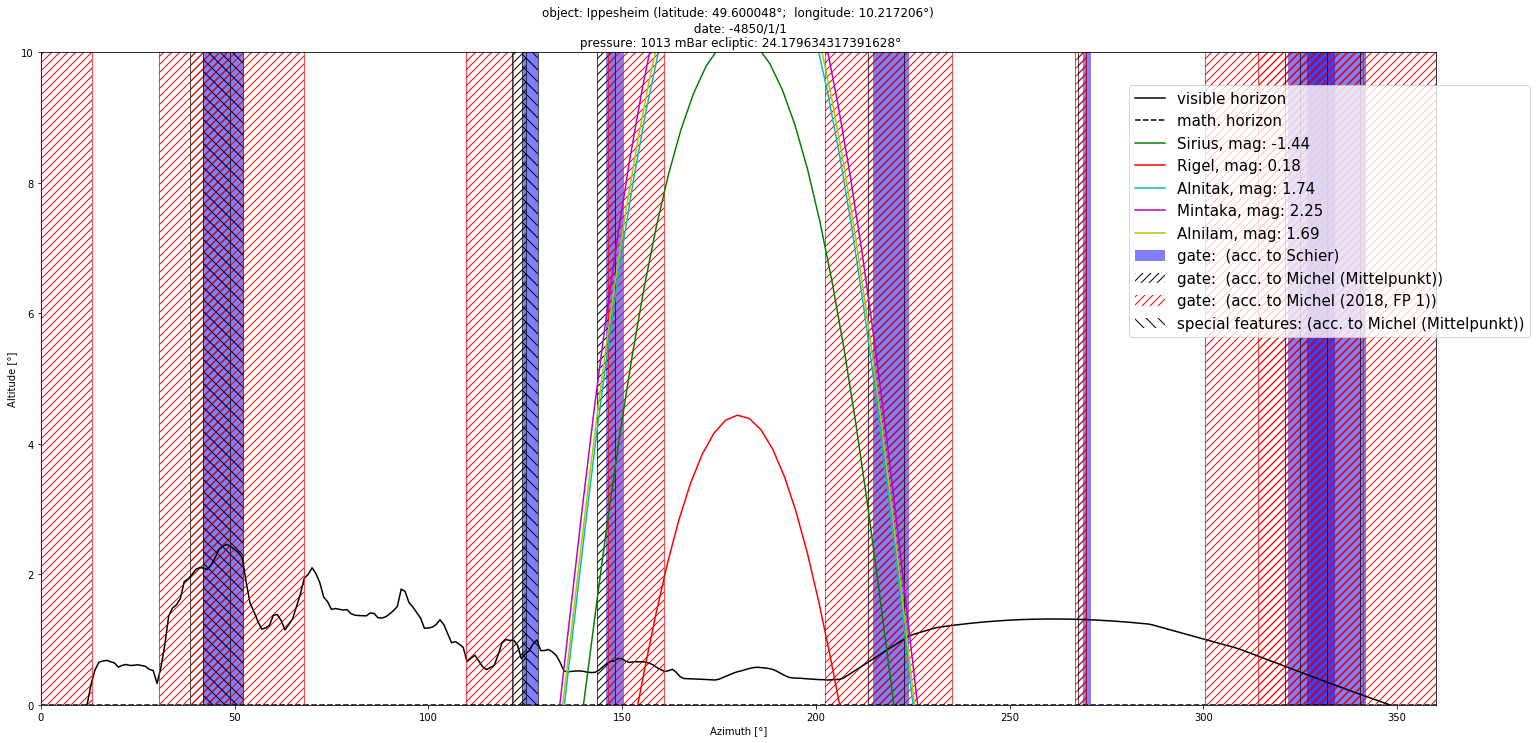

In [38]:
AzimuthAltitudeFull(date="-4850/1/1", starname=["Sirius", "Rigel", "Alnitak", "Mintaka", "Alnilam"] ,  Anlage="KGAL0027", special="no selection", xmin=0, xmax=360, ymin=0, ymax=10, pressureval=1013, zoom=False)

## Work in Progress

In [39]:
%%capture
'''
#%%capture
#starlist=starsforwidget
#result=SearchGate(starlist=starsforwidget)
objectlist=["QuedlinburgI", "QuedlinburgII", "Bielen","Hopferstadt","Ippesheim"]
colorlist=["red", "green", "blue", "orange", "black"]
plt.figure(figsize=(18,12))
for i in range(len(result)):
    x=result[i][0]["azimuth"]
    y=[result[i][0]["year"]]*len(result[i][0]["azimuth"])
    plt.plot(x, y, linewidth=0, marker='+', color=colorlist[objectlist.index(result[i][0]["object"])], markersize=11);

for i in range(5):
    plt.plot(x, y, linewidth=0, marker='+', color=colorlist[i], markersize=11, label=objectlist[i]);    
plt.xlabel("azimuth [°]", fontsize=18)
plt.ylabel("year", fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., numpoints=1)


# SEARCH GATES
def SearchGate(starlist=["Sirius"]):
    result=list()
    for time in range(1):
        for element in ["KGAL0003", "KGAL0007", "KGAL0023", "KGAL0011", "KGAL0027"]:
        #for element in ["KGAL0003"]:
            current=-4700+time*20
            for star in starlist:
                if FindStarCluster(year=current, starname=star, objects=element, max_offset=1.2):
                    result.append(FindStarCluster(year=current, starname=star, objects=element, max_offset=1.2))
    return result;
'''

In [40]:
#{"2 gates":{"QuedlinburgI":"KGAL0003","QuedlinburgII":"KGAL0007", "Hopferstadt":"KGAL0023", "Bielen":"KGAL0011","Ippesheim":"KGAL0027"}}
